In [1]:
import pandas as pd
import numpy as np
import os
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def return_all_regions():
    return ['AEC', 'AECI', 'CPLE', 'CPLW',
    'DUK', 'FMPP', 'FPC',
    'FPL', 'GVL', 'HST', 'ISNE',
    'JEA', 'LGEE', 'MISO', 'NSB',
    'NYIS', 'OVEC', 'PJM', 'SC',
    'SCEG', 'SEC', 'SOCO',
    'SPA', 'SWPP', 'TAL', 'TEC',
    'TVA', 'ERCO',
    'AVA', 'AZPS', 'BANC', 'BPAT',
    'CHPD', 'CISO', 'DOPD',
    'EPE', 'GCPD', 'IID',
    'IPCO', 'LDWP', 'NEVP', 'NWMT',
    'PACE', 'PACW', 'PGE', 'PNM',
    'PSCO', 'PSEI', 'SCL', 'SRP',
    'TEPC', 'TIDC', 'TPWR', 'WACM',
    'WALC', 'WAUW']

Processing CISO


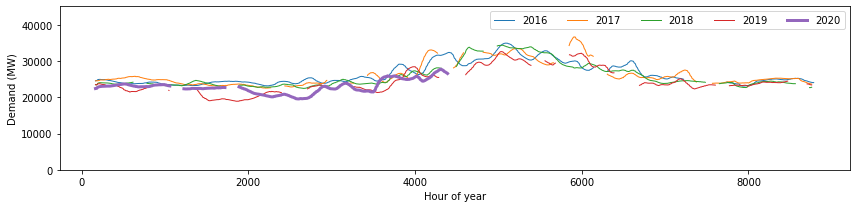

In [3]:
def plot(df, region):
    
    
    
    fig, ax = plt.subplots(figsize=(12,3))
    
    
    for year in range(2016, 2021):
        tmp = df.loc[df['year'] == year]
        tmp = tmp.reset_index()
        lw = 3 if year == 2020 else 1
        ax.plot(tmp.index, tmp['demand (MW)'].rolling(24*7).mean(), label=year, linewidth=lw)
    plt.legend(ncol=5)
    ax.set_ylim(0, ax.get_ylim()[1]*1.2)
    ax.set_ylabel('Demand (MW)')
    ax.set_xlabel('Hour of year')
    plt.tight_layout()
    plt.savefig(f'plots/cleaned_{region}.png')

        
input_path = 'data/'

regions = return_all_regions()

#regions = ['CISO',]

regions.sort()

for region in regions:
    print(f'Processing {region}')


    df = pd.read_csv(f'{input_path}/csv_{region}.csv',
                    dtype={'demand (MW)':np.float64},
                    na_values=['MISSING', 'EMPTY'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    df['year'] = df['date_time'].apply(lambda x : x.year)
    plot(df, region)
    

Processing AEC
Processing AECI
Processing AVA
Processing AZPS
Processing BANC
Processing BPAT
Processing CHPD
Processing CISO
Processing CPLE
Processing CPLW
Processing DOPD
Processing DUK
Processing EPE
Processing ERCO
Processing FMPP
Processing FPC
Processing FPL
Processing GCPD
Processing GVL
Processing HST
Processing IID
Processing IPCO


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Processing ISNE
Processing JEA
Processing LDWP
Processing LGEE
Processing MISO
Processing NEVP
Processing NSB
Processing NWMT
Processing NYIS
Processing PACE
Processing PACW
Processing PGE
Processing PJM
Processing PNM
Processing PSCO
Processing PSEI
Processing SC
Processing SCEG
Processing SCL
Processing SOCO
Processing SPA
Processing SRP
Processing SWPP
Processing TAL
Processing TEC
Processing TEPC
Processing TIDC
Processing TPWR
Processing TVA
Processing WACM
Processing WALC
Processing WAUW


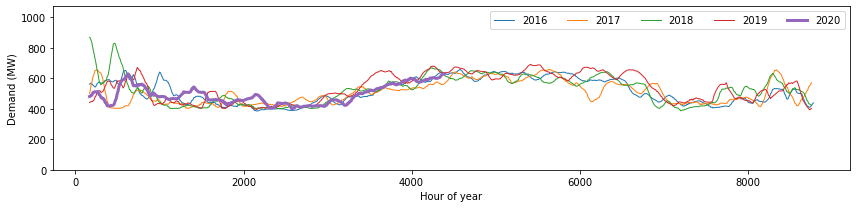

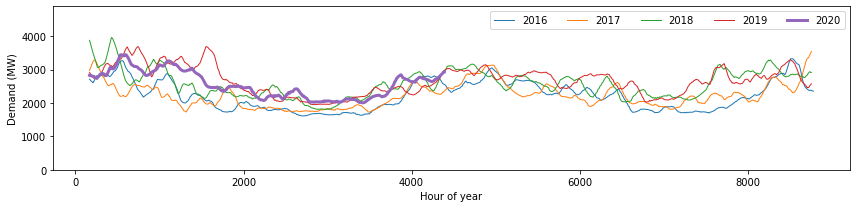

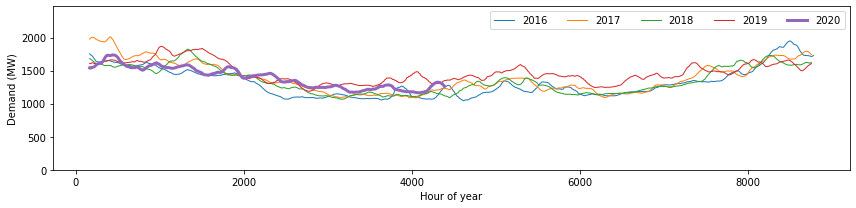

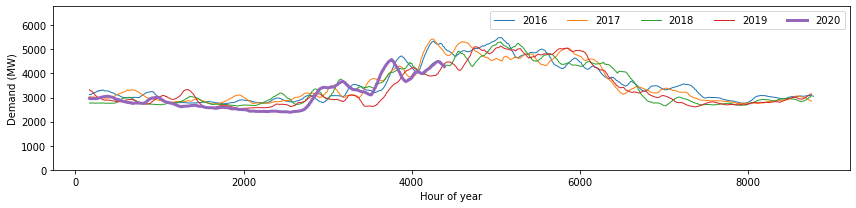

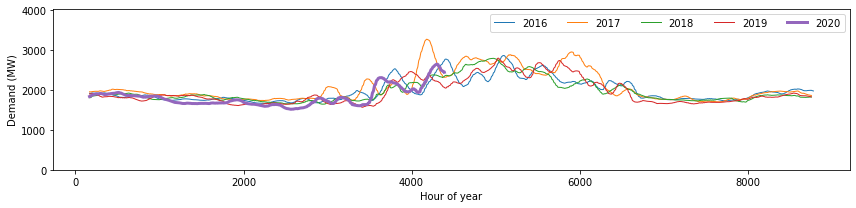

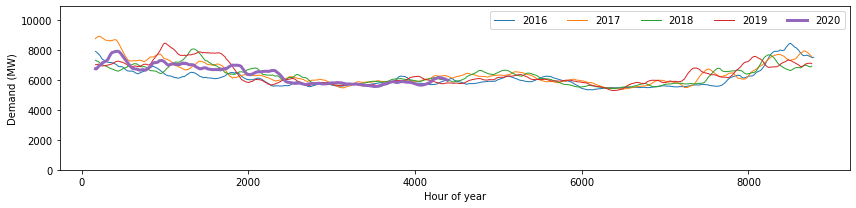

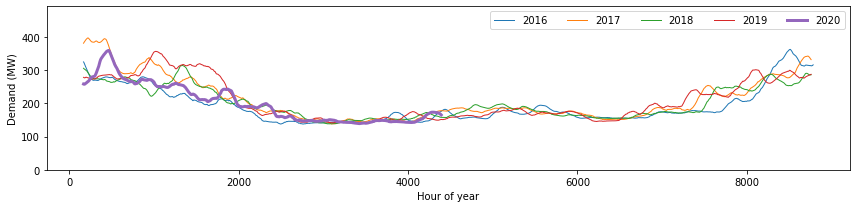

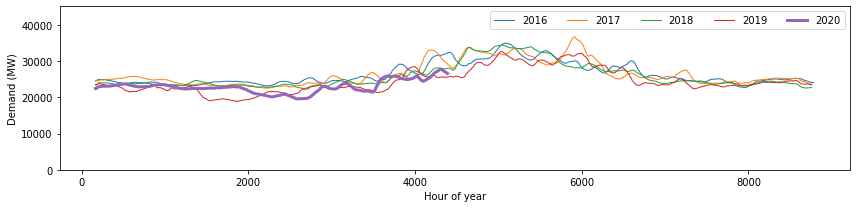

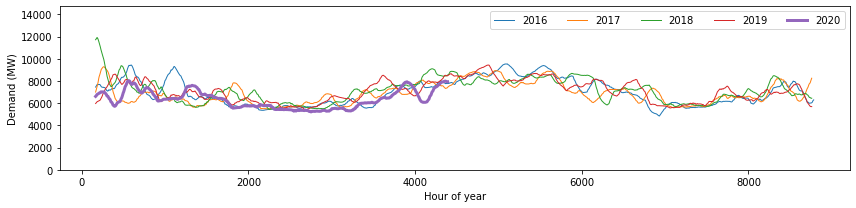

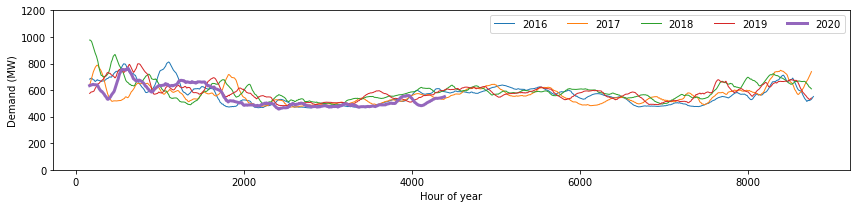

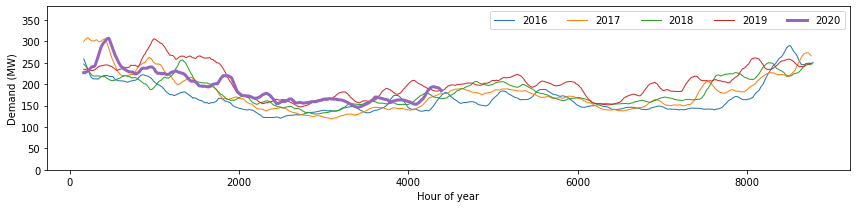

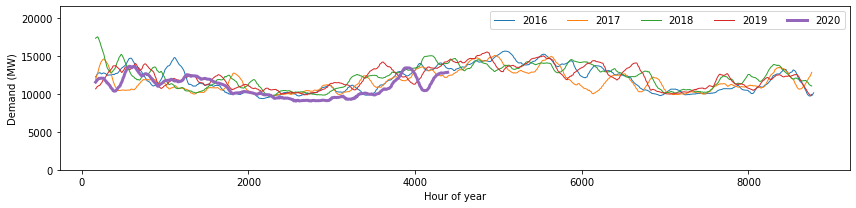

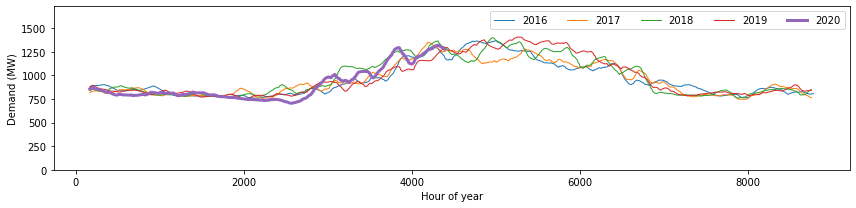

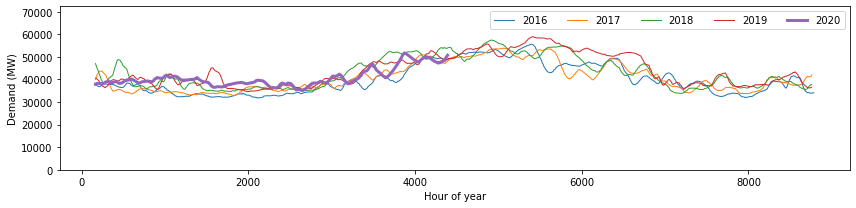

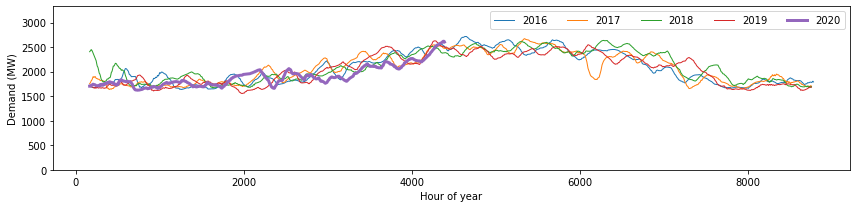

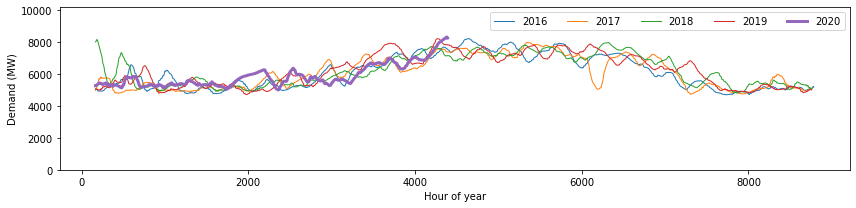

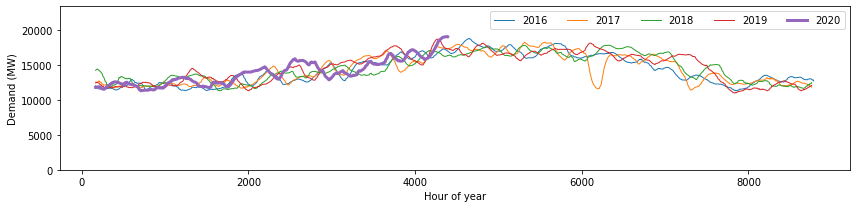

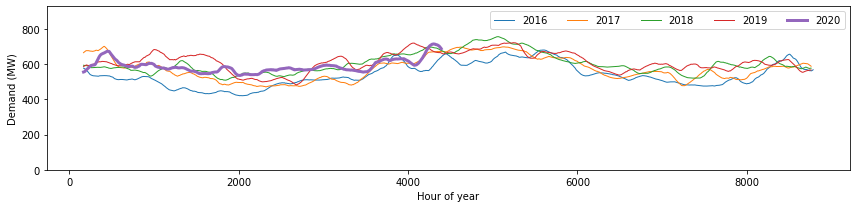

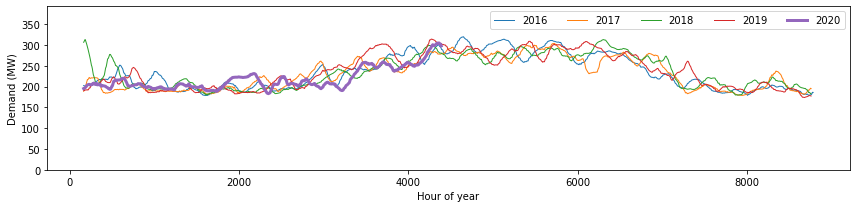

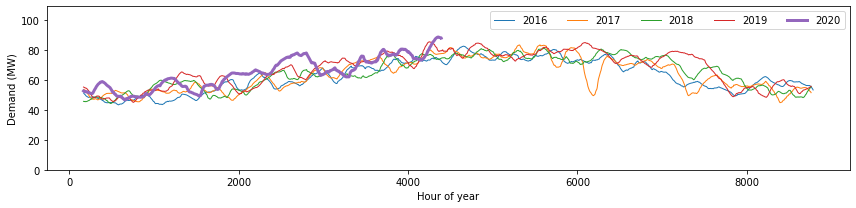

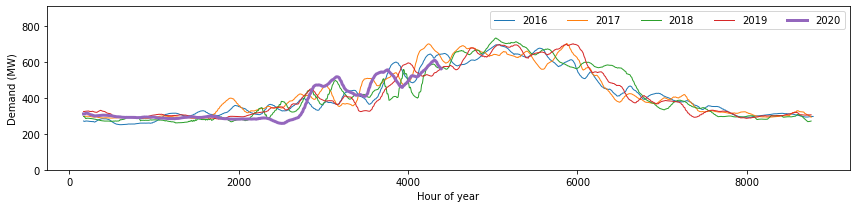

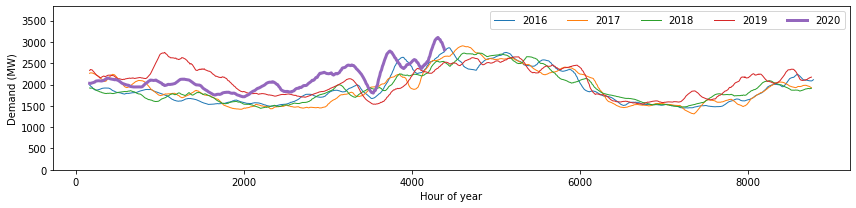

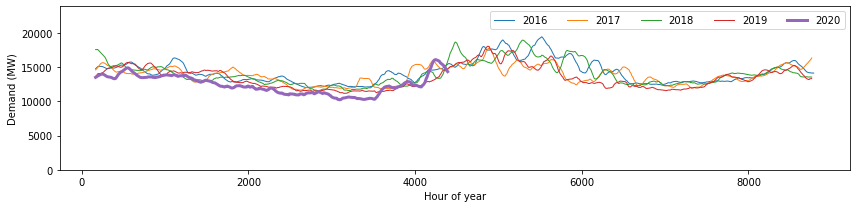

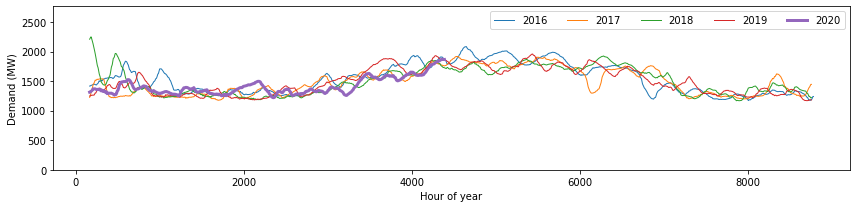

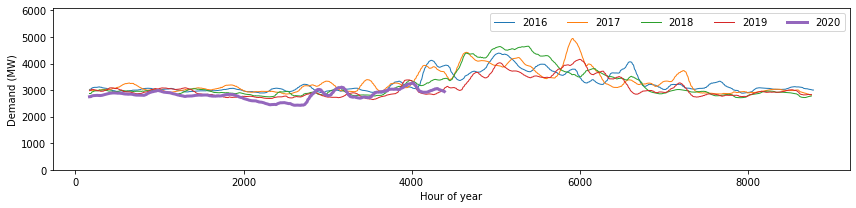

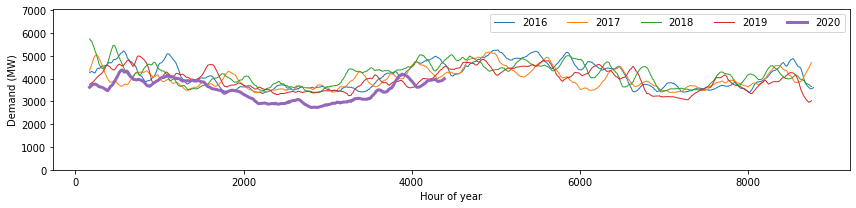

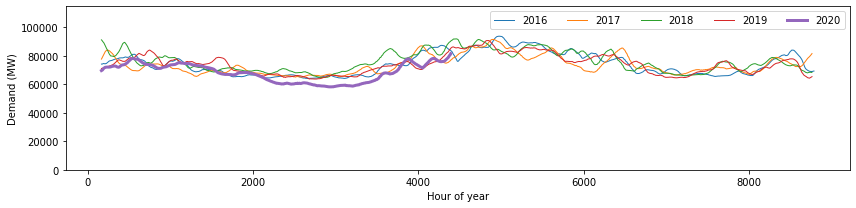

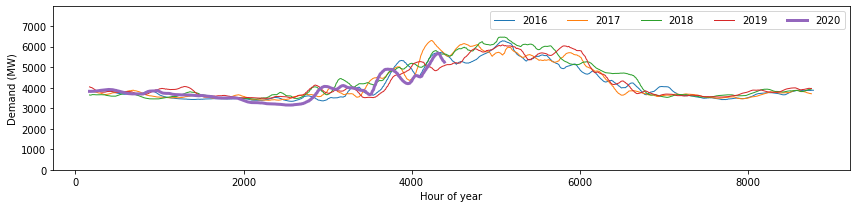

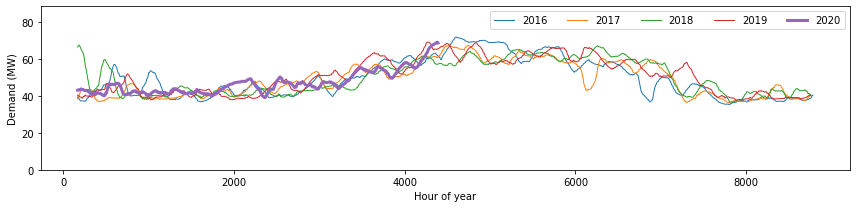

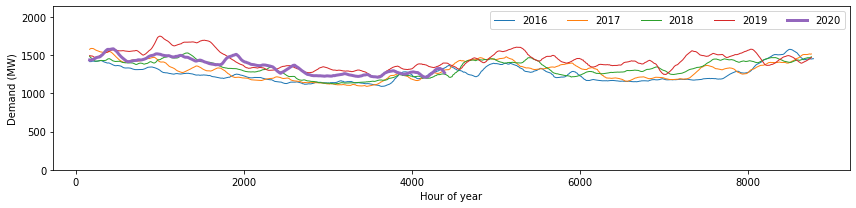

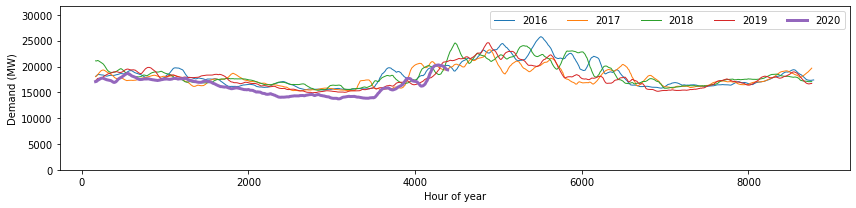

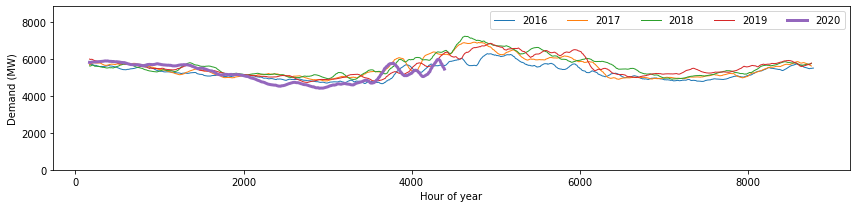

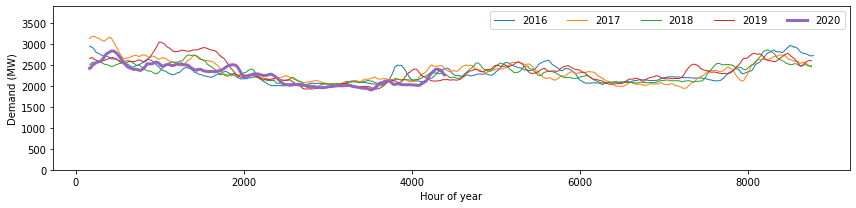

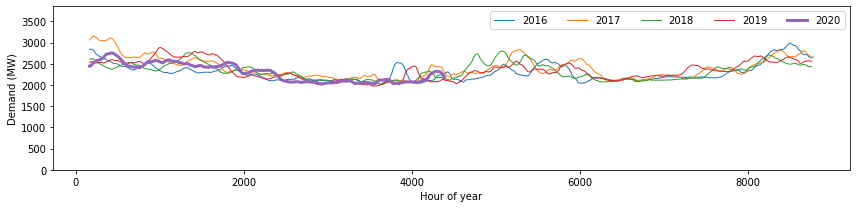

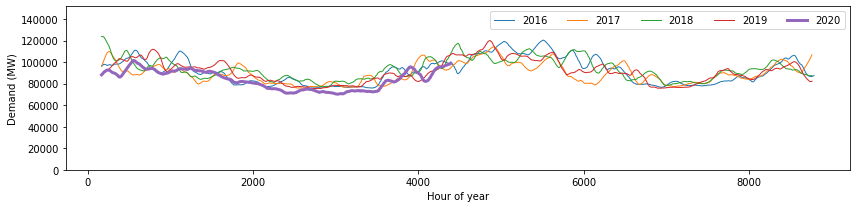

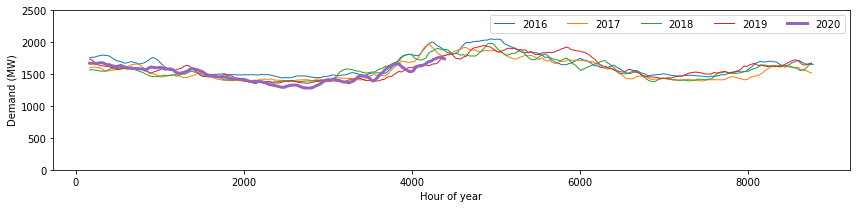

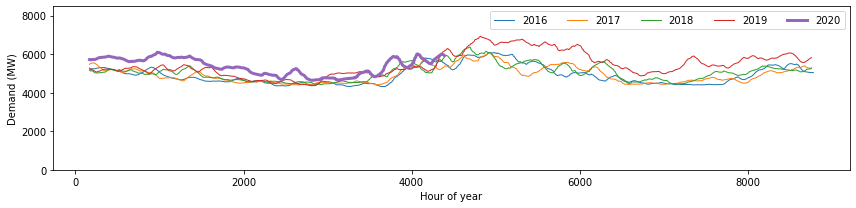

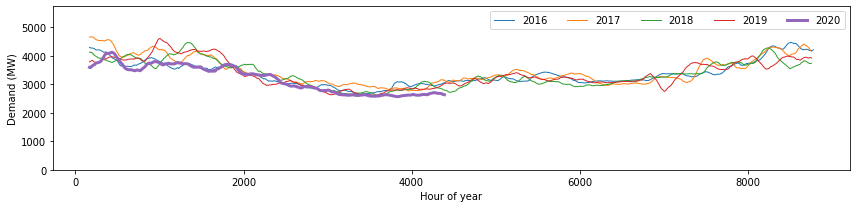

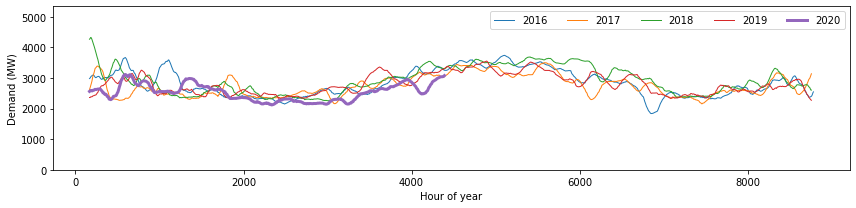

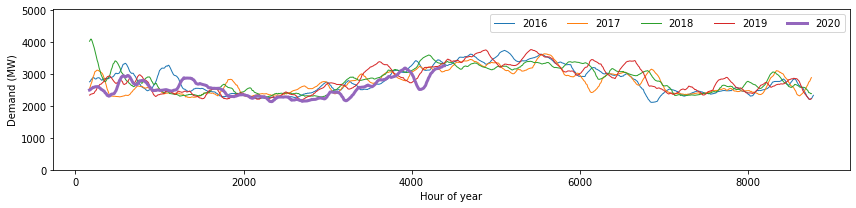

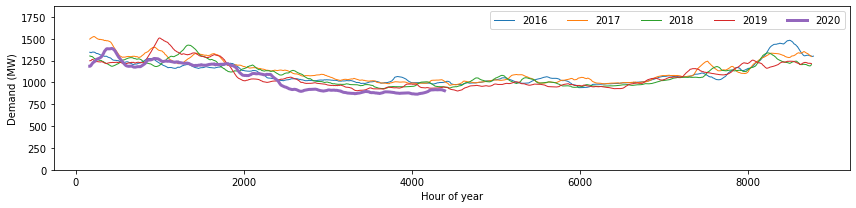

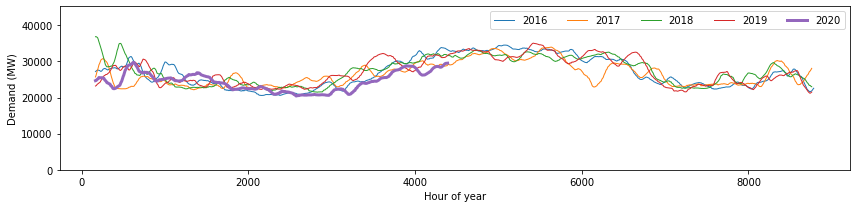

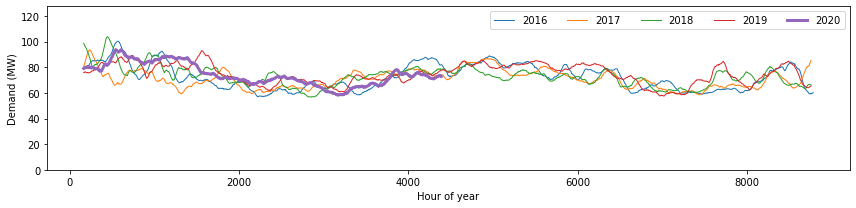

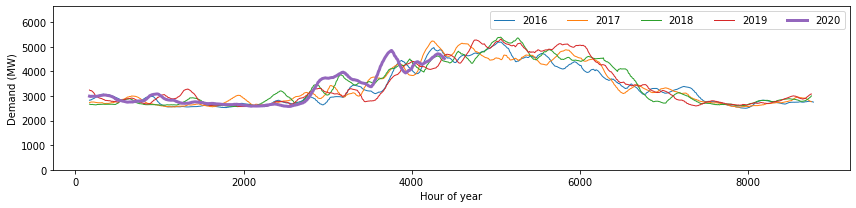

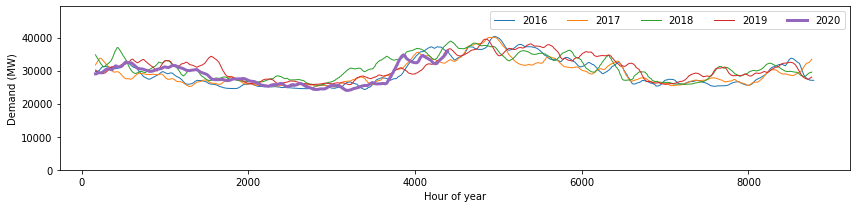

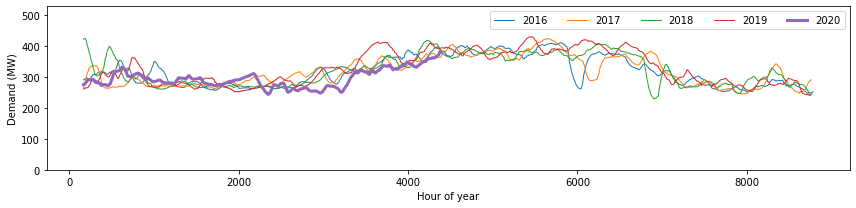

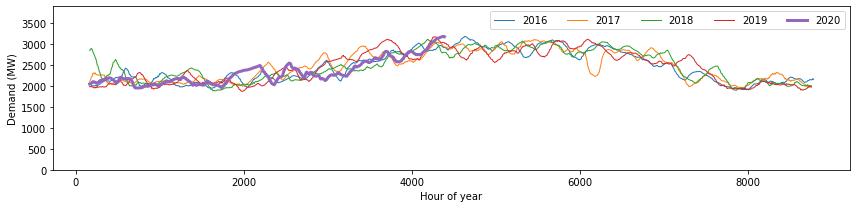

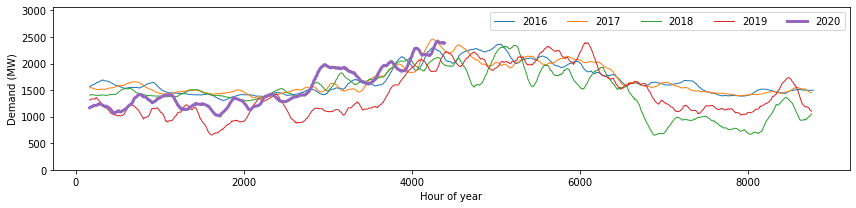

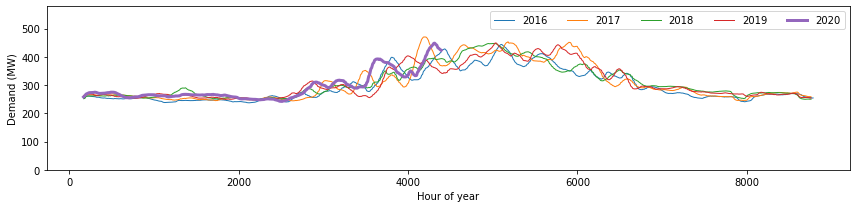

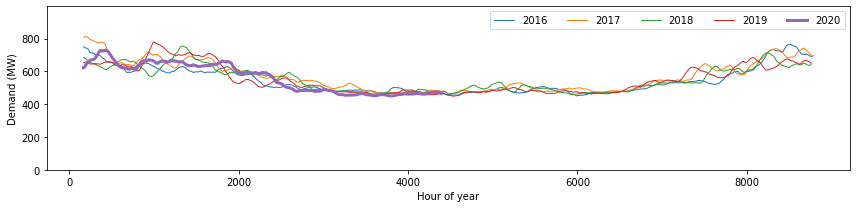

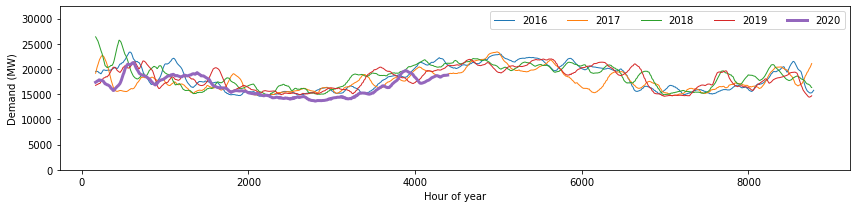

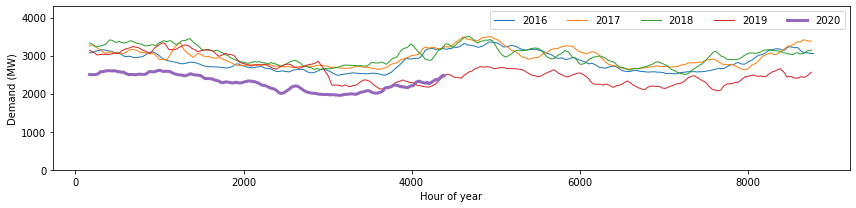

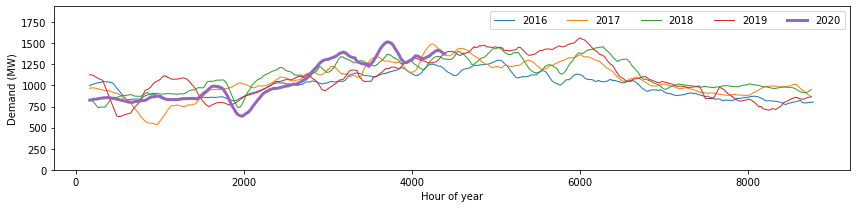

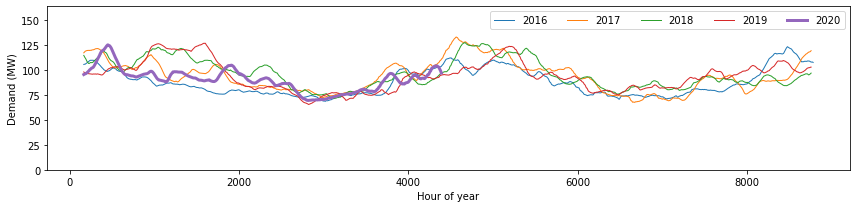

In [6]:
def plot(df, region):
    
    
    
    fig, ax = plt.subplots(figsize=(12,3))
    
    
    for year in range(2016, 2021):
        tmp = df.loc[df['year'] == year]
        tmp = tmp.reset_index()
        lw = 3 if year == 2020 else 1
        ax.plot(tmp.index, tmp[region].rolling(24*7).mean(), label=year, linewidth=lw)
    plt.legend(ncol=5)
    ax.set_ylim(0, ax.get_ylim()[1]*1.2)
    ax.set_ylabel('Demand (MW)')
    ax.set_xlabel('Hour of year')
    plt.tight_layout()
    plt.savefig(f'plots_imp/cleaned_{region}.png')

        
input_path = 'data/'

regions = return_all_regions()

#regions = ['CISO',]

regions.sort()

df = pd.read_csv('MICE_output/mean_impute_csv_MASTER_28Sept2020.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].apply(lambda x : x.year)

for region in regions:
    if region in ['OVEC', 'SEC']:
        continue
    print(f'Processing {region}')
    
    plot(df, region)
    